# Introduction
Many ML problems involve a big number of features for each instance. It could make training phase slow and lead to overfitting. So it is important to reduce the number of variables in data while keeping as much of the variation as possibile. That's there **dimensionality reduction** techniques come in.


This notebook contain <span style='color: blue'> qualitative comparison </span> of muplitple algorithms for reduce dataset's dimension. 


<span style='text-decoration: underline'>Methods being compared: </span>
 * UMAP: https://umap-learn.readthedocs.io/en/latest/
 * TSNE: https://github.com/DmitryUlyanov/Multicore-TSNE
 * PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
 * TruncatedSVD: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD
 
<span style='text-decoration: underline'> Datasets being used:</span>  MNIST (784 features per instance), Fashion MNIST (784), PenDigits (64), Statlog (9)

# Libraries

In [1]:
# !pip install cmake==3.18.2
# !pip install multicoretsne
# !pip install umap-learn

In [3]:
# analysis & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("white")
sns.set_palette("magma")

# methods for comparison
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from umap import UMAP

# datasets for comparison
from sklearn.datasets import fetch_openml, load_digits
import gensim

# Data loading

In [4]:
fmnist, fmnist_labels = fetch_openml(data_id=40996, return_X_y=True, as_frame=False)
digits, digits_labels = load_digits(return_X_y=True, as_frame=False)
shuttle, shuttle_labels = fetch_openml(data_id=40685, return_X_y=True, as_frame=False)
mnist, mnist_labels = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [ ]:
print('shape of fashion mnist dataset is ', fmnist.shape)
print('shape of mnist dataset is ', mnist.shape)
print('shape of pendigits dataset is ', digits.shape)
print('shape of shuttle dataset is ', shuttle.shape)

shape of fashion mnist dataset is  (70000, 784)
shape of mnist dataset is  (70000, 784)
shape of pendigits dataset is  (1797, 64)
shape of shuttle dataset is  (58000, 9)


# Apply different techniques of dimension reduction

## single comparison
First, let's briefly look at how much time each method uses to apply and what quality we can get with the default parameters. Here we will use **MNIST** dataset.

In [ ]:
%%time
pca_mnist = PCA(n_components=2).fit_transform(mnist)

CPU times: user 5.96 s, sys: 386 ms, total: 6.34 s
Wall time: 3.43 s


In [ ]:
%%time
svd_mnist = TruncatedSVD(n_components=2).fit_transform(mnist)

CPU times: user 4.73 s, sys: 231 ms, total: 4.96 s
Wall time: 2.61 s


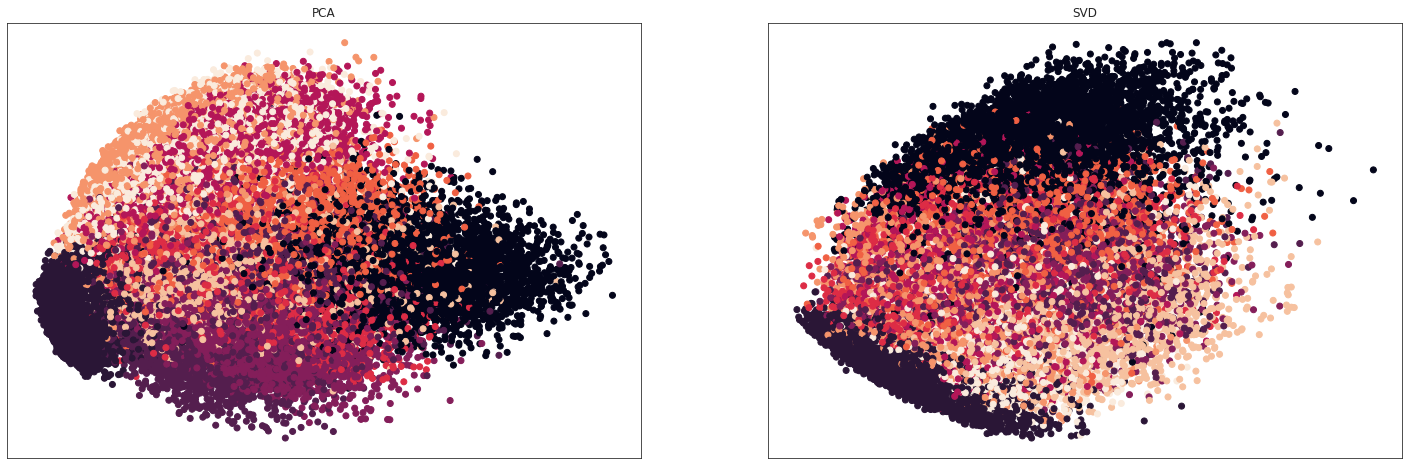

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))
names_of_labels_mnist = np.unique(mnist_labels.astype(int)).tolist()
g1 = ax1.scatter(pca_mnist[:, 0], pca_mnist[:, 1], c=mnist_labels.astype(int))
g2 = ax2.scatter(svd_mnist[:, 0], svd_mnist[:, 1], c=mnist_labels.astype(int))
ax1.set_title('PCA')
ax2.set_title('SVD')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

In [ ]:
%%time
umap_mnist = UMAP(n_components=2).fit_transform(mnist)

CPU times: user 2min 23s, sys: 2.19 s, total: 2min 25s
Wall time: 1min 26s


In [ ]:
%%time
tsne_mnist = TSNE(n_components=2).fit_transform(mnist)

CPU times: user 27min 51s, sys: 2.09 s, total: 27min 53s
Wall time: 27min 47s


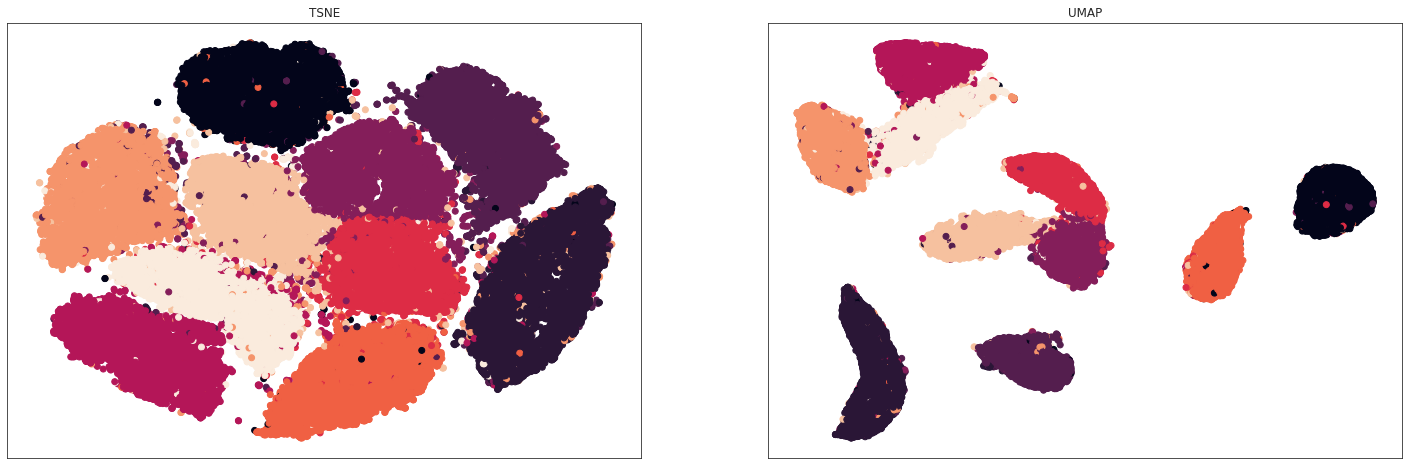

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))
names_of_labels_mnist = np.unique(mnist_labels.astype(int)).tolist()
g1 = ax1.scatter(tsne_mnist[:, 0], tsne_mnist[:, 1], c=mnist_labels.astype(int))
g2 = ax2.scatter(umap_mnist[:, 0], umap_mnist[:, 1], c=mnist_labels.astype(int))
ax1.set_title('TSNE')
ax2.set_title('UMAP')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

As we can see, the longest (in execution) algorithm is *TSNE*, however it has very good quality, especially compared to PCA and SVD, the results of which are very similar. Of course, the greatest efficiency belongs to the UMAP method, because it combines fast time and pleasant results

## hypeparameters of UMAP method
In this section, we will look at how different combinations of hyperparameter values will affect UMAP results. We will vary the parameters `n_neighbors` and `min_dist` and try to apply the UMAP to the dataset **PenDigits**

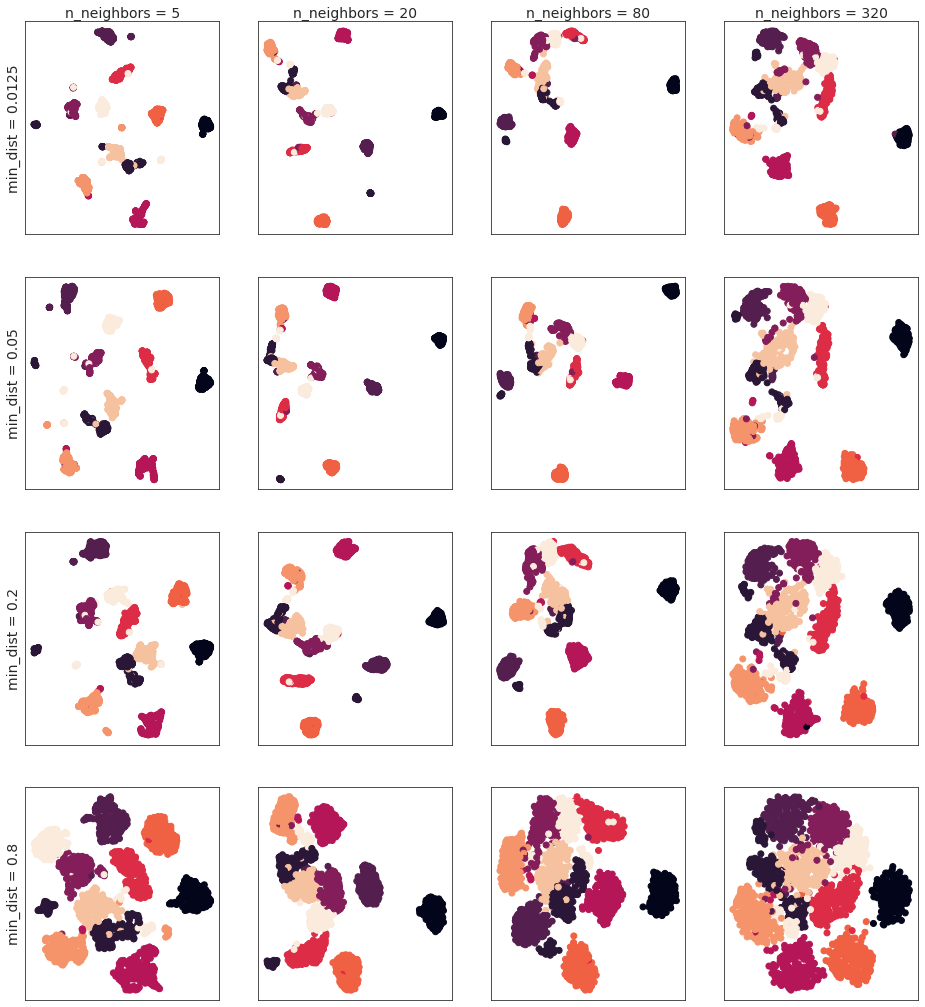

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(16, 18))
for i, dist in enumerate([0.0125, 0.05, 0.2, 0.8]):
    for j, neighbors in enumerate([5, 20, 80, 320]): 
        if i == 0:
            axs[i, j].set_xlabel(f'n_neighbors = {neighbors}', fontsize=14) 
            axs[i, j].xaxis.set_label_position('top') 
        if j == 0:
            axs[i, j].set_ylabel(f'min_dist = {dist}', fontsize=14)  
        umap_embeddings = UMAP(n_components=2,
                               n_neighbors=neighbors,
                               min_dist=dist).fit_transform(digits)
        axs[i, j].scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=digits_labels.astype(int))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

Let's do the same thing for **MNIST** dataset

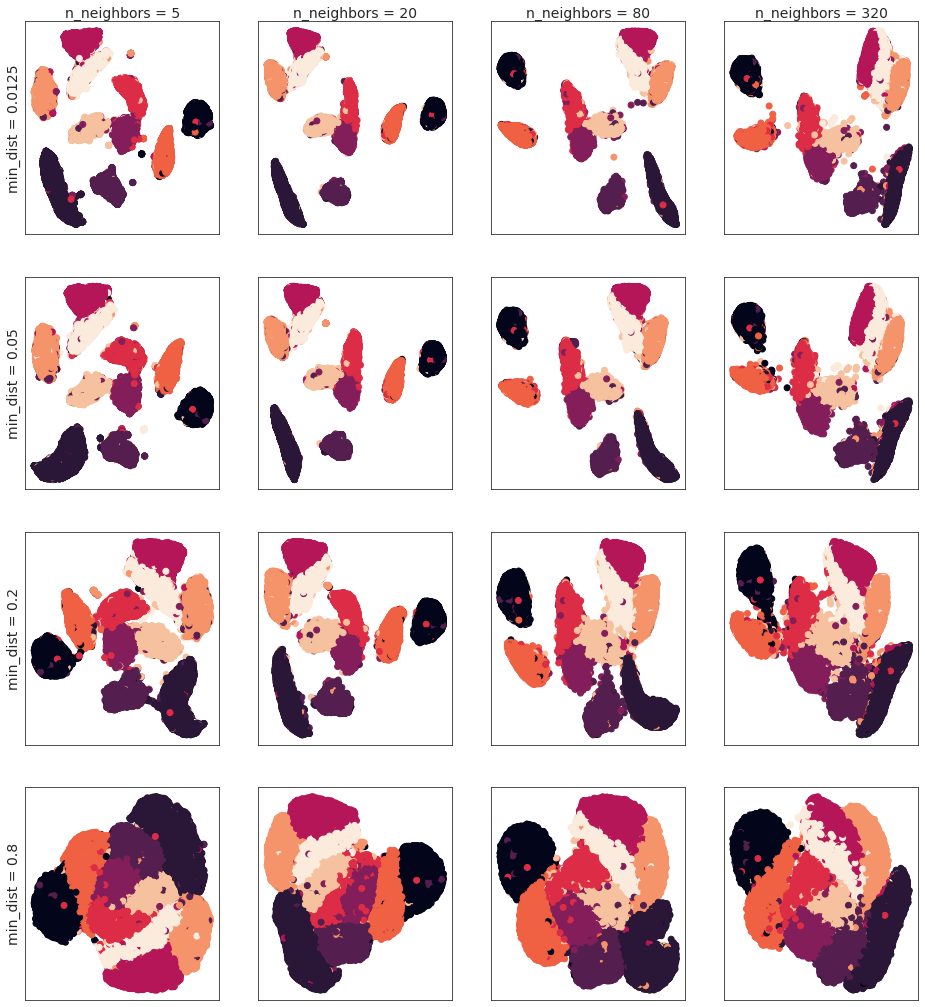

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(16, 18))
for i, dist in enumerate([0.0125, 0.05, 0.2, 0.8]):
    for j, neighbors in enumerate([5, 20, 80, 320]): 
        if i == 0:
            axs[i, j].set_xlabel(f'n_neighbors = {neighbors}', fontsize=14) 
            axs[i, j].xaxis.set_label_position('top') 
        if j == 0:
            axs[i, j].set_ylabel(f'min_dist = {dist}', fontsize=14)  
        umap_embeddings = UMAP(n_components=2,
                               n_neighbors=neighbors,
                               min_dist=dist).fit_transform(mnist)
        axs[i, j].scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=mnist_labels.astype(int))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

## Comparison of different techniques
Now we are getting closer to the main goal of our research. Let's compare all the methods (UMAP, TSNE, PCA, SVD) using different datasets to see how each of them deal with its task

In [7]:
TSNE_model = TSNE(n_components=2)
UMAP_model = UMAP(n_components=2)
SVD_model = TruncatedSVD(n_components=2)
PCA_model = PCA(n_components=2)
methods = [['UMAP', UMAP_model], ['PCA', PCA_model], ['TSNE', TSNE_model], ['SVD', SVD_model]]
datasets = [['MNIST', mnist, mnist_labels], ['PenDigits', digits, digits_labels],
            ['FSH-mnist', fmnist, fmnist_labels], ['Shuttle', shuttle, shuttle_labels]]

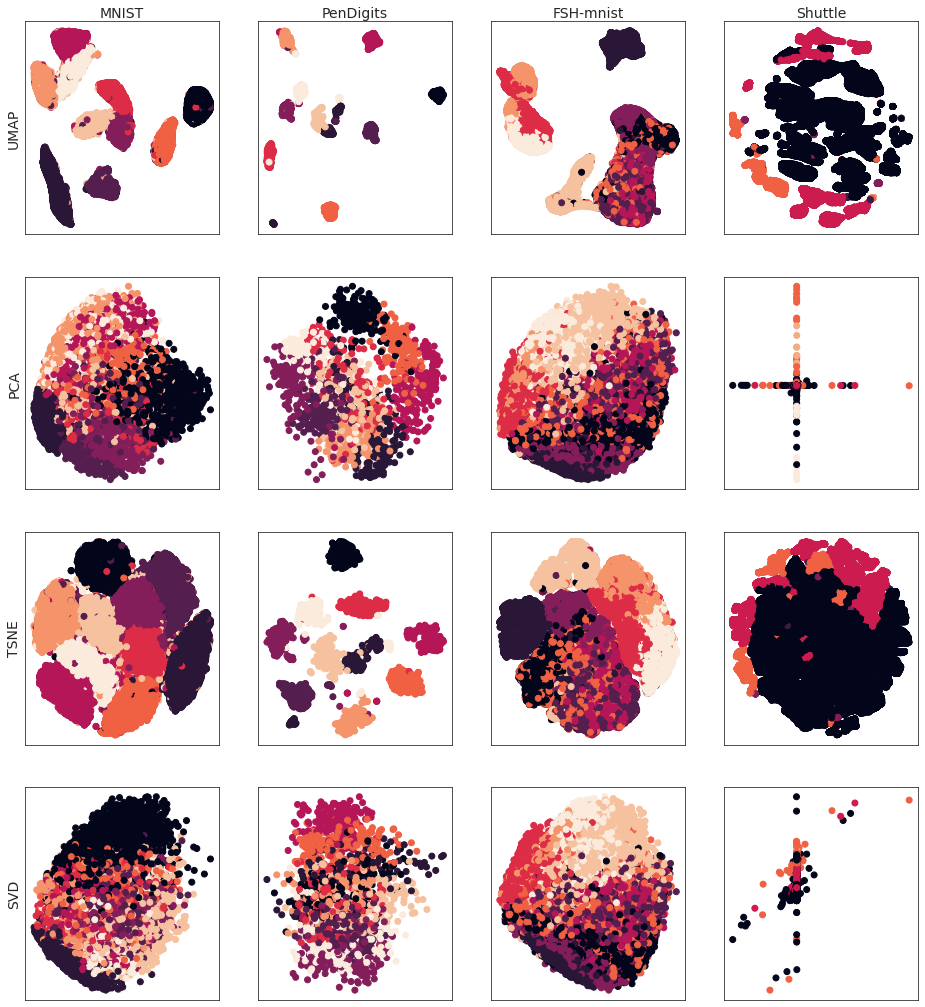

In [8]:
fig, axs = plt.subplots(4, 4, figsize=(16, 18))
for i, (name, model) in enumerate(methods):
    for j, (title, data, labels) in enumerate(datasets): 
        if i == 0:
            axs[i, j].set_xlabel(f'{title}', fontsize=14) 
            axs[i, j].xaxis.set_label_position('top') 
        if j == 0:
            axs[i, j].set_ylabel(f'{name}', fontsize=14)  
      
        embeddings = model.fit_transform(X=data)
      
        axs[i, j].scatter(embeddings[:, 0], embeddings[:, 1], c=labels.astype(int))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

# Summary
After analysis, we can conclude:
- TSNE shows good results, but it takes a lot of time and resources
- PCA and SVD show similar results and they are faster than other
- UMAP is faster than TSNE and gives similar results, so it seems to be the best